In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report  

In [3]:
bankfull=pd.read_csv('bank_full.csv',sep=';')
bankfull

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bankfull.shape

(45211, 17)

In [5]:
bankfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bankfull.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
bankfull.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
bankfull.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:xlabel='y', ylabel='count'>

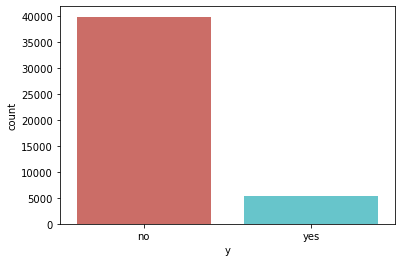

In [9]:
sb.countplot(x="y",data=bankfull,palette="hls") 

<AxesSubplot:xlabel='job'>

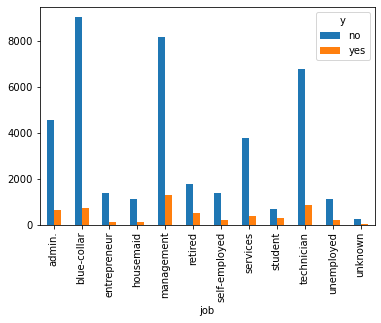

In [10]:
pd.crosstab(bankfull.job,bankfull.y).plot(kind='bar')

Text(0, 0.5, 'Proportion of Customers')

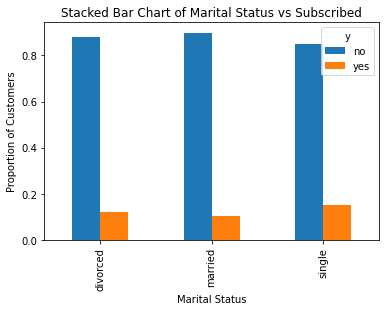

In [11]:
table=pd.crosstab(bankfull.marital,bankfull.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Stacked Bar Chart of Marital Status vs Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

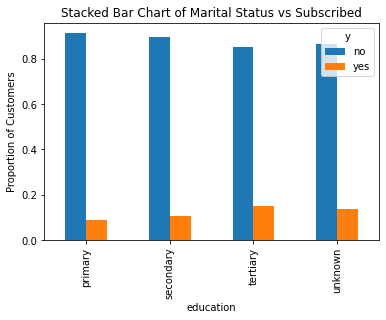

In [12]:
table=pd.crosstab(bankfull.education,bankfull.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Stacked Bar Chart of Marital Status vs Subscribed')
plt.xlabel('education')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency of Subsribe')

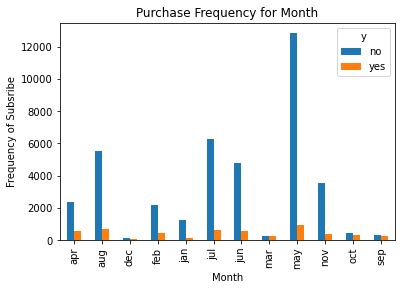

In [13]:
pd.crosstab(bankfull.month,bankfull.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Subsribe')

<AxesSubplot:title={'center':'age'}, xlabel='y'>

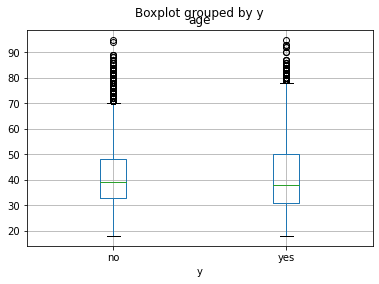

In [14]:
bankfull.boxplot(column='age', by='y')

Text(0, 0.5, 'Frequency of Subscribe')

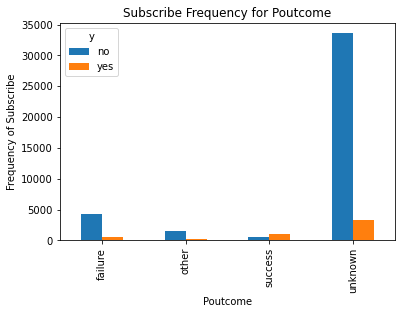

In [15]:
pd.crosstab(bankfull.poutcome,bankfull.y).plot(kind='bar')
plt.title('Subscribe Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Subscribe')

In [16]:
bankfull.drop(["month","education","pdays","day","campaign","age",'loan',"housing",'marital'],axis=1,inplace=True)

In [17]:
bankfull

,job,default,balance,contact,duration,previous,poutcome,y
0,management,no,2143,unknown,261,0,unknown,no
1,technician,no,29,unknown,151,0,unknown,no
2,entrepreneur,no,2,unknown,76,0,unknown,no
3,blue-collar,no,1506,unknown,92,0,unknown,no
4,unknown,no,1,unknown,198,0,unknown,no
...,...,...,...,...,...,...,...,...
45206,technician,no,825,cellular,977,0,unknown,yes
45207,retired,no,1729,cellular,456,0,unknown,yes
45208,retired,no,5715,cellular,1127,3,success,yes
45209,blue-collar,no,668,telephone,508,0,unknown,no


In [18]:
contactd=pd.get_dummies(bankfull['contact'],drop_first=True)
jobd=pd.get_dummies(bankfull['job'],drop_first=True)
poutcomed=pd.get_dummies(bankfull['poutcome'],drop_first=True)
defaultd = pd.get_dummies(bankfull['default'],drop_first=True)

In [19]:
bankfull=pd.concat([bankfull,defaultd,poutcomed,jobd,contactd],axis=1)
bankfull


,job,default,balance,contact,duration,previous,poutcome,y,yes,other,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,management,no,2143,unknown,261,0,unknown,no,0,0,...,1,0,0,0,0,0,0,0,0,1
1,technician,no,29,unknown,151,0,unknown,no,0,0,...,0,0,0,0,0,1,0,0,0,1
2,entrepreneur,no,2,unknown,76,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1
3,blue-collar,no,1506,unknown,92,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1
4,unknown,no,1,unknown,198,0,unknown,no,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,no,825,cellular,977,0,unknown,yes,0,0,...,0,0,0,0,0,1,0,0,0,0
45207,retired,no,1729,cellular,456,0,unknown,yes,0,0,...,0,1,0,0,0,0,0,0,0,0
45208,retired,no,5715,cellular,1127,3,success,yes,0,0,...,0,1,0,0,0,0,0,0,0,0
45209,blue-collar,no,668,telephone,508,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
bankfull.drop(['default','poutcome','job',"contact"],axis=1,inplace = True)
bankfull

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,no,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,no,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,no,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,no,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,no,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,0,yes,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
45207,1729,456,0,yes,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
45208,5715,1127,3,yes,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
45209,668,508,0,no,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
bankfull_new= bankfull.copy()
bankfull_new['y'] = bankfull_new['y'].map({'no':0,'yes':1})
bankfull_new

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
45207,1729,456,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
45208,5715,1127,3,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
45209,668,508,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
X = bankfull.drop("y",axis=1)
Y = bankfull["y"]

In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [28]:
classifier.coef_  # coefficients of features   

array([[ 2.63340984e-05,  3.93338516e-03,  2.77454110e-03,
        -1.27725193e-01, -5.24091897e-01,  2.12452063e+00,
        -6.17660224e-01, -8.37895638e-01, -3.96783908e-01,
        -2.85620756e-01, -3.13846250e-01,  5.34617663e-01,
        -2.34133562e-01, -6.04939929e-01,  6.14581927e-01,
        -2.90464226e-01, -3.82427967e-02, -1.33304192e-02,
        -6.58714898e-02, -1.38423262e+00]])

In [29]:
y_pred = classifier.predict(X)

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix = confusion_matrix(Y,y_pred)
accuracy=accuracy_score(Y,y_pred)
print (cm,accuracy)

[[39013   909]
 [ 3607  1682]] 0.9001128044060074


In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     39922
         yes       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.88     45211



In [33]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

y_predict= label_encoder.fit_transform(y_pred)

y_actual= label_encoder.fit_transform(bankfull_new['y'])

Text(0, 0.5, 'True Positive Rate')

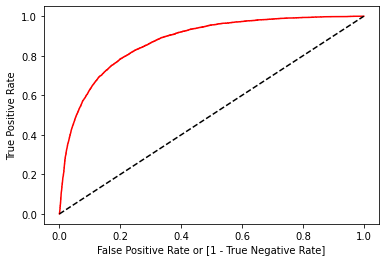

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_actual, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_actual, y_predict)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')